In [ ]:
#Importing necessary library
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt

In [ ]:
with open('mail_data.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
df = pd.read_csv('mail_data.csv', encoding=encoding)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['spam'].value_counts()

1    4825
0     747
Name: spam, dtype: int64

In [ ]:
import seaborn as sns

<Axes: ylabel='count'>

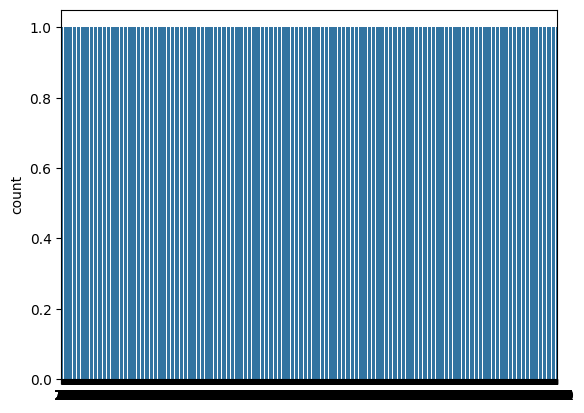

In [ ]:
sns.countplot(df['spam'])

In [ ]:
df.duplicated().sum()

415

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
df.shape

(5157, 2)

<Axes: ylabel='count'>

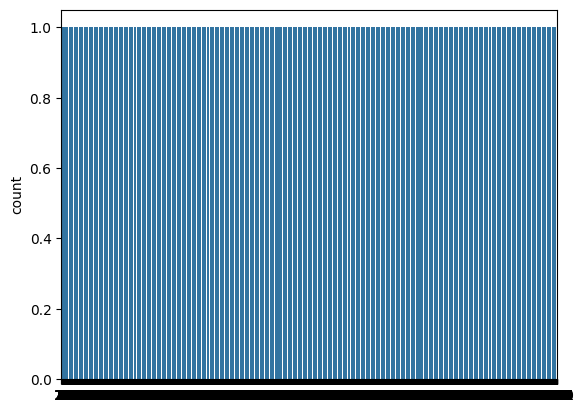

In [ ]:
sns.countplot(df['spam'])

In [ ]:
df['spam'].value_counts()

1    4516
0     641
Name: spam, dtype: int64

# **Seperate in X and Y**

In [ ]:
X = df['text'].values
y = df['spam'].values

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

# **Train - Test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [ ]:
X_train.shape

(4125,)

In [ ]:
X_test.shape

(1032,)

In [ ]:
y_train.shape

(4125,)

In [ ]:
y_test.shape

(1032,)

# **Pre Processing**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

# **Training by ML Algorithm**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [ ]:
pipe = make_pipeline(cv, nb)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9864341085271318

In [ ]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([1])

In [ ]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))